In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import probflow as pf
import warnings
import torch 

warnings.filterwarnings("ignore")

randn = lambda x : np.random.randn(x).astype('float32')

x = randn(100)
y = 2 * x - 1 + randn(100)

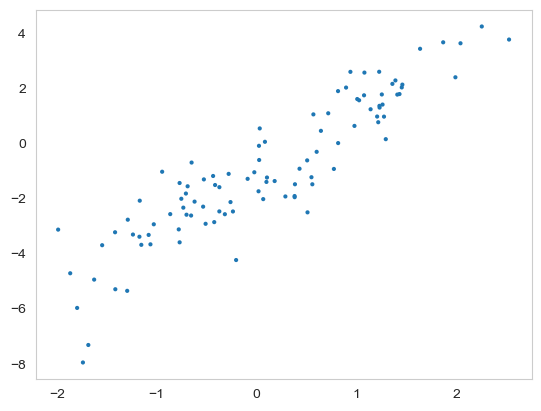

In [20]:
plt.scatter(
    x, y,
    marker = '.',
    edgecolor = 'none'
)
plt.grid(False)
plt.show()

$$y \sim N(wx + b, \sigma)$$

In [21]:
pf.set_backend('pytorch')

class SimpleLinearRegression(pf.ContinuousModel) :
    def __init__(self) :
        self.w = pf.Parameter(name = 'Weight') # weight (coefficient)
        self.b = pf.Parameter(name = 'Bias') # bias (y intercept)
        self.s = pf.ScaleParameter(name = 'Std') # standard deviation
    
    def __call__(self, x):
        x = torch.tensor(x)
        return pf.Normal(x * self.w() + self.b(), self.s())

In [22]:
model = SimpleLinearRegression()
model.fit(x, y)

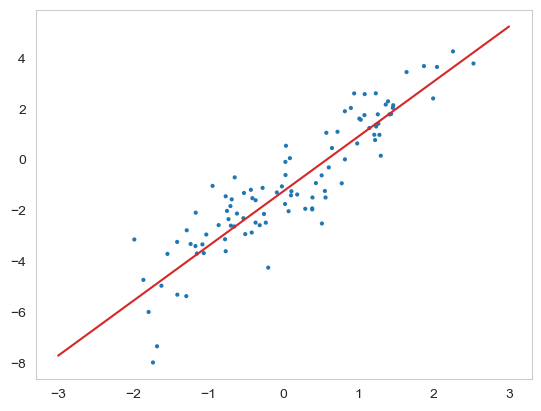

In [24]:
x_test = np.array([-3, 3]).astype('float32')
preds = model.predict(x_test)

plt.plot(x_test, preds, 'tab:red')
plt.scatter(
    x, y,
    marker = '.',
    edgecolor = 'none'
)
plt.grid(False)
plt.show()

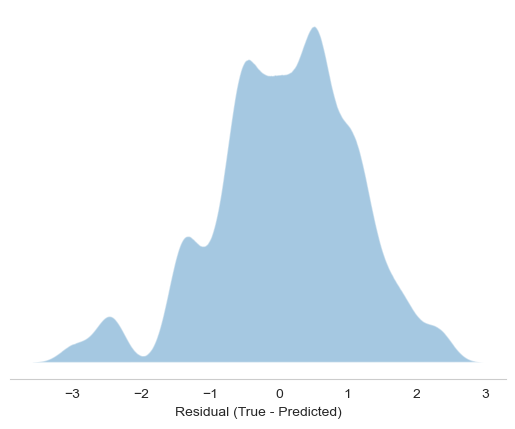

In [29]:
model.residuals_plot(x, y)
plt.grid(False)
plt.show()

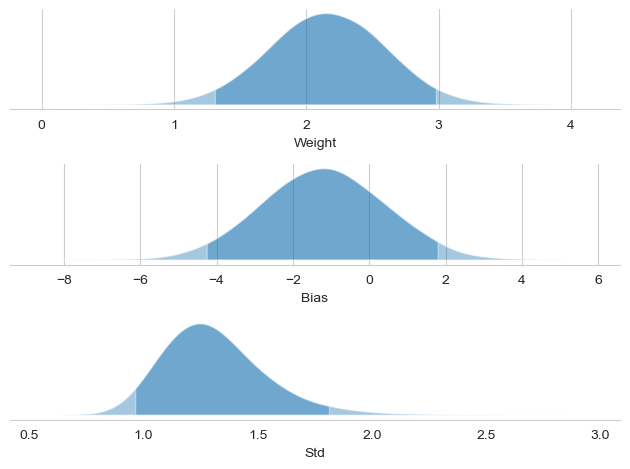

In [28]:
model.posterior_plot(ci = 0.95)
plt.grid(False)
plt.show()

### Compute 95% predictive confidence intervals

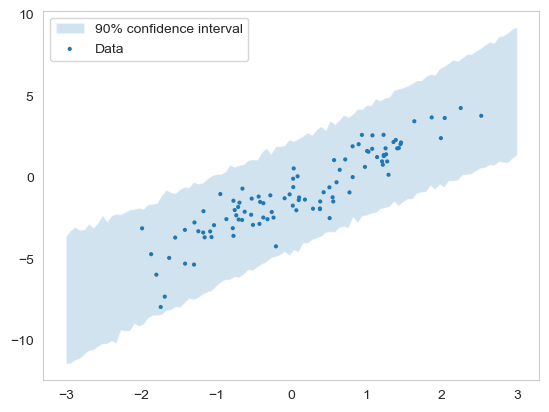

In [34]:
x_eval = np.linspace(-3, 3, 100).astype('float32')
lower_barrier, upper_barrier = model.predictive_interval(x_eval, ci = 0.90)

plt.fill_between(
    x_eval, 
    lower_barrier,
    upper_barrier,
    alpha = 0.2
)
plt.scatter(
    x, y,
    marker = '.',
    edgecolor = 'none',
    color = 'tab:blue'
)
plt.legend([
    '90% confidence interval',
    'Data'
], loc = 'upper left')
plt.grid(False)
plt.show()

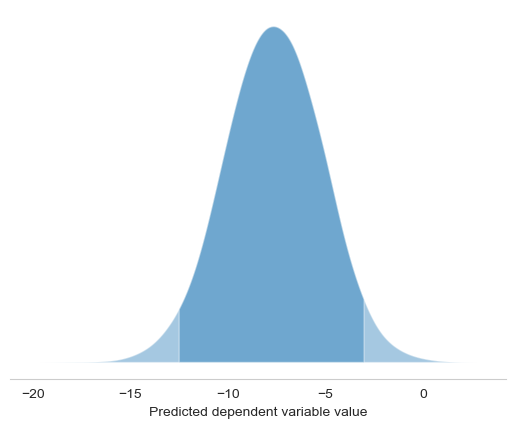

In [35]:
model.pred_dist_plot(x_eval[:1], ci = 0.95)
plt.grid(False)
plt.show()

In [36]:
x_eval = np.array([-3, 3]).astype('float32')
samples = model.predictive_sample(x_eval, n = 100)

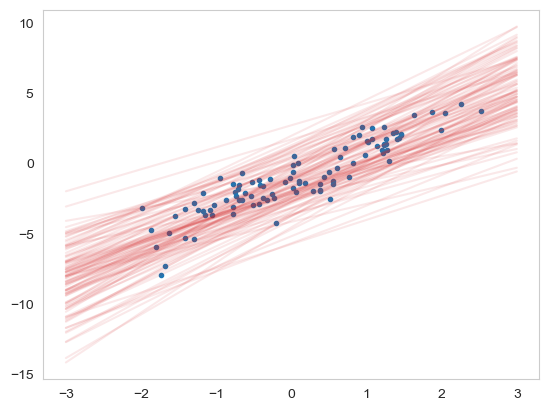

In [43]:
x_plot = np.broadcast_to(
    x_eval[:, np.newaxis], samples.T.shape
)
plt.plot(x_plot, samples.T, 'tab:red', alpha = 0.1)
plt.scatter(x, y, marker = '.')
plt.grid(False)
plt.show()

Bayesian R-squared distribution

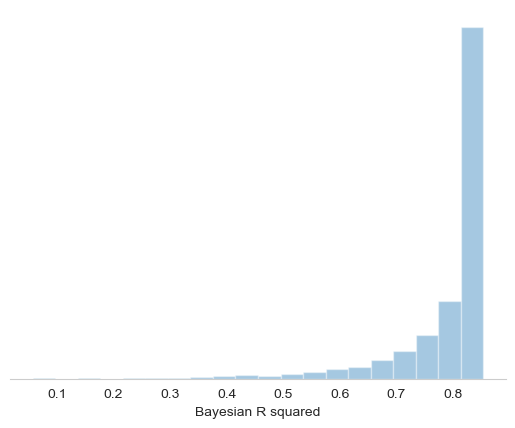

In [50]:
model.r_squared_plot(
    x, y
)
plt.grid(False)
plt.show()

### Multiple Linear Regression

$$y \sim N(x_1w_1 + x_2 w_2 + \cdots + x_Nw_N + b, \sigma)$$

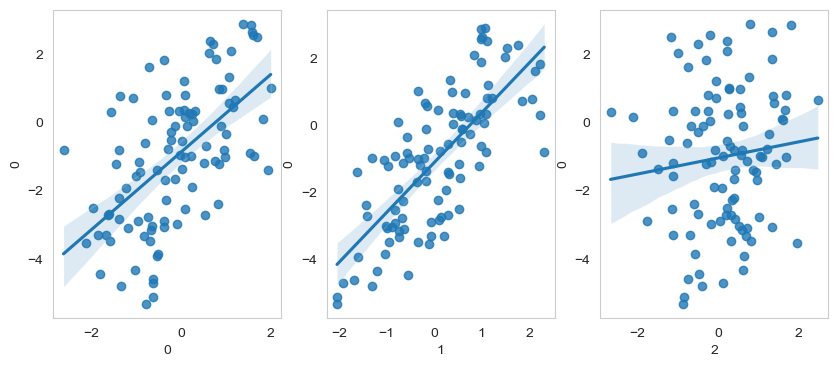

In [73]:
randn = lambda *x : np.random.randn(*x).astype('float32')

D = 3 # number of dimensions
N = 100 # number of data

x = pd.DataFrame(randn(N, D))
weights = randn(D, 1)
y = x @ weights - 1 + 0.2 * randn(N, 1)

plt.figure(figsize=(10, 4))
for i in range(D) :
    plt.subplot(1, D, i+1)
    sns.regplot(x = x[i], y = y[0])
    plt.grid(False)
plt.show()

In [74]:
class MultipleLinearRegression(pf.ContinuousModel) :
    def __init__(self, dims):
        self.w = pf.Parameter([dims, 1], name = 'Weights')
        self.b = pf.Parameter(name = 'Bias')
        self.s = pf.ScaleParameter(name = 'Std')
    
    def __call__(self, x):
        x = torch.tensor(x.values)
        return pf.Normal(x @ self.w() + self.b(), self.s())

In [75]:
model = MultipleLinearRegression(3)
model.fit(x, y, lr = 0.1, epochs = 300)

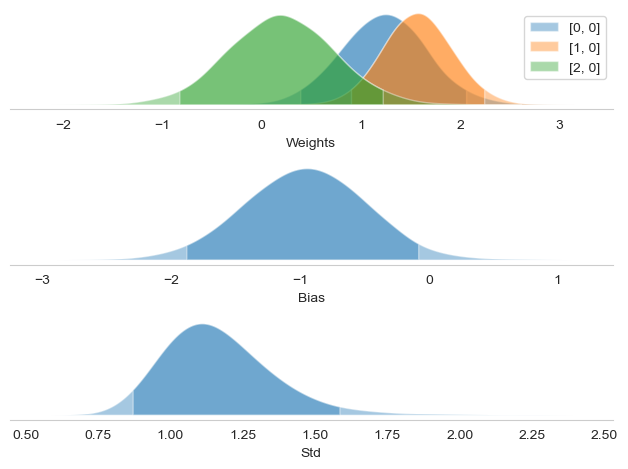

In [84]:
plt.rcParams['axes.grid'] = False
model.posterior_plot(ci = 0.95)
plt.show()